In [10]:
import glob
!pip install seaborn
import seaborn as sns
import os

from PIL import Image
import pandas as pd
import re
import random
import matplotlib.pyplot as plt

In [11]:
folder = "data/chest_xray/*/*.jpeg"
files = glob.glob(folder)
files

['data/chest_xray/test/test_normal0.jpeg',
 'data/chest_xray/test/test_normal1.jpeg',
 'data/chest_xray/test/test_normal2.jpeg',
 'data/chest_xray/test/test_normal3.jpeg',
 'data/chest_xray/test/test_normal4.jpeg',
 'data/chest_xray/test/test_normal5.jpeg',
 'data/chest_xray/test/test_normal6.jpeg',
 'data/chest_xray/test/test_normal7.jpeg',
 'data/chest_xray/test/test_normal8.jpeg',
 'data/chest_xray/test/test_normal9.jpeg',
 'data/chest_xray/test/test_normal10.jpeg',
 'data/chest_xray/test/test_normal11.jpeg',
 'data/chest_xray/test/test_normal12.jpeg',
 'data/chest_xray/test/test_normal13.jpeg',
 'data/chest_xray/test/test_normal14.jpeg',
 'data/chest_xray/test/test_normal15.jpeg',
 'data/chest_xray/test/test_normal16.jpeg',
 'data/chest_xray/test/test_normal17.jpeg',
 'data/chest_xray/test/test_normal18.jpeg',
 'data/chest_xray/test/test_normal19.jpeg',
 'data/chest_xray/test/test_normal20.jpeg',
 'data/chest_xray/test/test_normal21.jpeg',
 'data/chest_xray/test/test_normal22.jpeg'

In [12]:
folder = "data/chest_xray/*/*.jpeg"
files = glob.glob(folder)
category = []
lung_condition = []
fname = []

for f in files:
    s1 = f.split("/")
    category.append(s1[2])
    fname.append(f)

    s2 = s1[3].split("_")
    s2 = s2[1][:-6]
    s2 = re.sub(r'\d+', '', s2)
    lung_condition.append(s2)

all_data_df = pd.DataFrame({"dataset type": category,
                            "x-ray result": lung_condition,
                            "filename": fname})
all_data_df

,dataset type,x-ray result,filename
0,test,normal,data/chest_xray/test/test_normal0.jpeg
1,test,normal,data/chest_xray/test/test_normal1.jpeg
2,test,normal,data/chest_xray/test/test_normal2.jpeg
3,test,normal,data/chest_xray/test/test_normal3.jpeg
4,test,normal,data/chest_xray/test/test_normal4.jpeg
...,...,...,...
5851,val,pneumonia,data/chest_xray/val/val_pneumonia3.jpeg
5852,val,pneumonia,data/chest_xray/val/val_pneumonia4.jpeg
5853,val,pneumonia,data/chest_xray/val/val_pneumonia5.jpeg
5854,val,pneumonia,data/chest_xray/val/val_pneumonia6.jpeg


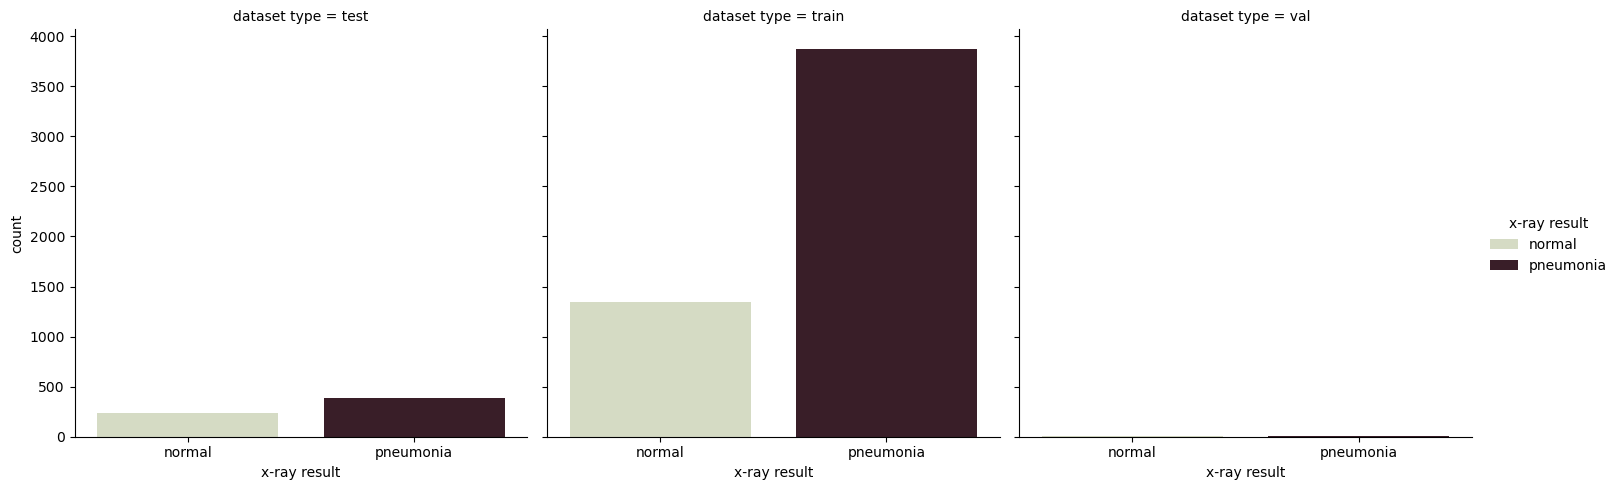

In [13]:
plot1 = sns.catplot(x="x-ray result",
                    col="dataset type",
                    kind="count", 
                    hue="x-ray result",  # Assign x variable to hue for coloring
                    palette="ch:.55",
                    data=all_data_df,
                    legend=True)

In [14]:
def labeller(row):
    if row["x-ray result"] == "pneumonia":
        return 1
    return 0


def get_basename(row):
    return os.path.basename(row["filename"])


all_data_df["labels"] = all_data_df.apply(labeller, axis=1)
all_data_df["s3_path"] = all_data_df.apply(get_basename, axis=1)
all_data_df

,dataset type,x-ray result,filename,labels,s3_path
0,test,normal,data/chest_xray/test/test_normal0.jpeg,0,test_normal0.jpeg
1,test,normal,data/chest_xray/test/test_normal1.jpeg,0,test_normal1.jpeg
2,test,normal,data/chest_xray/test/test_normal2.jpeg,0,test_normal2.jpeg
3,test,normal,data/chest_xray/test/test_normal3.jpeg,0,test_normal3.jpeg
4,test,normal,data/chest_xray/test/test_normal4.jpeg,0,test_normal4.jpeg
...,...,...,...,...,...
5851,val,pneumonia,data/chest_xray/val/val_pneumonia3.jpeg,1,val_pneumonia3.jpeg
5852,val,pneumonia,data/chest_xray/val/val_pneumonia4.jpeg,1,val_pneumonia4.jpeg
5853,val,pneumonia,data/chest_xray/val/val_pneumonia5.jpeg,1,val_pneumonia5.jpeg
5854,val,pneumonia,data/chest_xray/val/val_pneumonia6.jpeg,1,val_pneumonia6.jpeg


In [20]:
train_df_lst = all_data_df.loc[all_data_df["dataset type"] == "train",
                               ["labels", "s3_path"]]
train_df_lst = train_df_lst.reset_index(drop=True)
train_df_lst

,labels,s3_path
0,0,train_normal0.jpeg
1,0,train_normal1.jpeg
2,0,train_normal2.jpeg
3,0,train_normal3.jpeg
4,0,train_normal4.jpeg
...,...,...
5211,1,train_pneumonia3870.jpeg
5212,1,train_pneumonia3871.jpeg
5213,1,train_pneumonia3872.jpeg
5214,1,train_pneumonia3873.jpeg


In [21]:
test_df_lst = all_data_df.loc[all_data_df["dataset type"] == "test",
                              ["labels", "s3_path"]]
test_df_lst = test_df_lst.reset_index(drop=True)
test_df_lst

,labels,s3_path
0,0,test_normal0.jpeg
1,0,test_normal1.jpeg
2,0,test_normal2.jpeg
3,0,test_normal3.jpeg
4,0,test_normal4.jpeg
...,...,...
619,1,test_pneumonia385.jpeg
620,1,test_pneumonia386.jpeg
621,1,test_pneumonia387.jpeg
622,1,test_pneumonia388.jpeg


In [23]:
val_df_lst = all_data_df.loc[all_data_df["dataset type"] == "val",
                                        ["labels", "s3_path"]]
val_df_lst = val_df_lst.reset_index(drop=True)
val_df_lst

,labels,s3_path
0,0,val_normal0.jpeg
1,0,val_normal1.jpeg
2,0,val_normal2.jpeg
3,0,val_normal3.jpeg
4,0,val_normal4.jpeg
5,0,val_normal5.jpeg
6,0,val_normal6.jpeg
7,0,val_normal7.jpeg
8,1,val_pneumonia0.jpeg
9,1,val_pneumonia1.jpeg


In [24]:
def save_to_lst(df, fname):
    return df.to_csv(f"{fname}.lst",
                     sep="\t",
                     index=True,
                     header=False)


save_to_lst(train_df_lst, "train")
save_to_lst(test_df_lst, "test")
save_to_lst(val_df_lst, "val")